In [2]:
#Step 1: Import Libraries and Load Dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


file_path = '/content/online_advertising_performance_data.csv'
data = pd.read_csv(file_path)


print("Dataset Info:")
print(data.info())


print("\nFirst 5 Rows of the Dataset:")
print(data.head())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15408 entries, 0 to 15407
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   month                    15408 non-null  object 
 1   day                      15408 non-null  int64  
 2   campaign_number          15408 non-null  object 
 3   user_engagement          15408 non-null  object 
 4   banner                   15408 non-null  object 
 5   placement                14995 non-null  object 
 6   displays                 15408 non-null  int64  
 7   cost                     15408 non-null  float64
 8   clicks                   15408 non-null  int64  
 9   revenue                  15408 non-null  float64
 10  post_click_conversions   15408 non-null  int64  
 11  post_click_sales_amount  15408 non-null  float64
 12  Unnamed: 12              0 non-null      float64
 13  Unnamed: 13              0 non-null      float64
dtypes: float

In [13]:
# Replace 'correct_name' with the actual column names in your dataset
numeric_columns = ['displays', 'cost', 'clicks', 'revenue',
                   'post_click_conversions', 'post_click_sales_amount']

# Fill missing values in the specified numeric columns
data[numeric_columns] = data[numeric_columns].fillna(0)

# Create new calculated fields
data['CPC'] = data['cost'] / data['clicks']  # Cost per Click
data['Revenue Per Click'] = data['revenue'] / data['clicks']  # Revenue per Click
data['Conversion Rate'] = (data['post_click_conversions'] / data['clicks']) * 100  # Conversion Rate

# Add day of the week column
data['Weekday'] = data['day'].dt.day_name()  # Extract day of the week


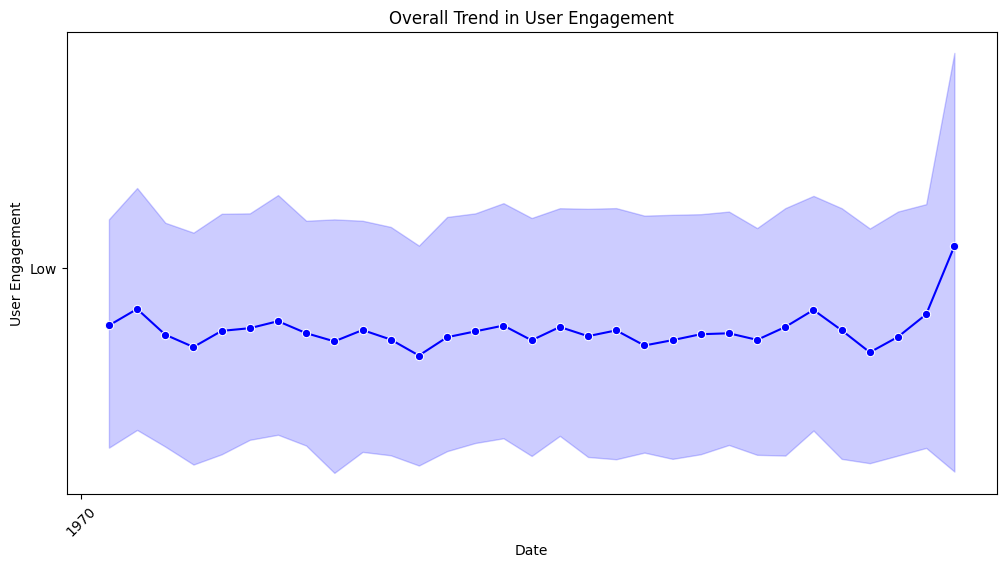

In [15]:
# 1. What is the overall trend in user engagement throughout the campaign period?
plt.figure(figsize=(12, 6))
sns.lineplot(x='day', y='user_engagement', data=data, marker='o', color='blue')
plt.title('Overall Trend in User Engagement')
plt.xlabel('Date')
plt.ylabel('User Engagement')
plt.xticks(rotation=45)
plt.show()



<ipython-input-17-4d260c88aff0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='banner', y='clicks', data=data, palette='Set3')


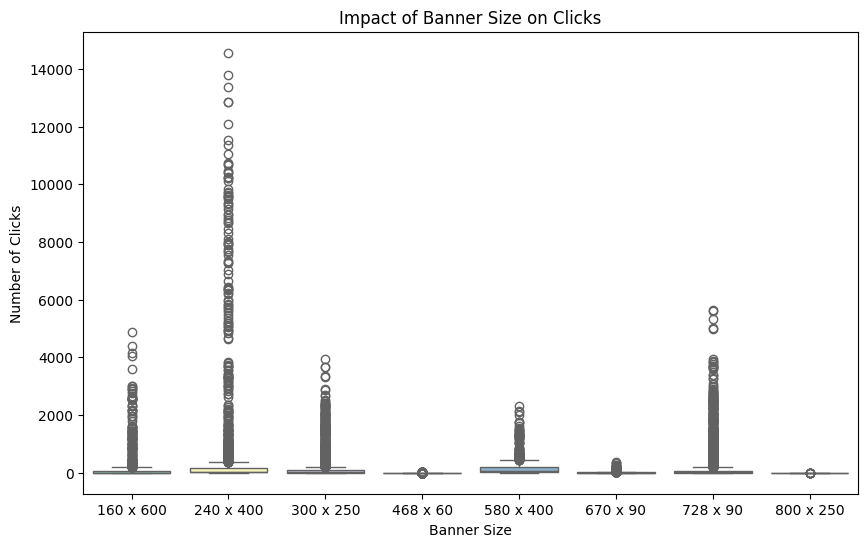

In [17]:
 # 2. How does the size of the ad (banner) impact the number of clicks generated?

plt.figure(figsize=(10, 6))
sns.boxplot(x='banner', y='c
licks', data=data, palette='Set3')
plt.title('Impact of Banner Size on Clicks')
plt.xlabel('Banner Size')
plt.ylabel('Number of Clicks')
plt.show()



Top Placements by Displays and Clicks:
            displays   clicks
placement                    
mno        143161775   993039
ghi         59740415  1247049
def         28177492   176097
jkl          7692732    75063
abc           242142     1584


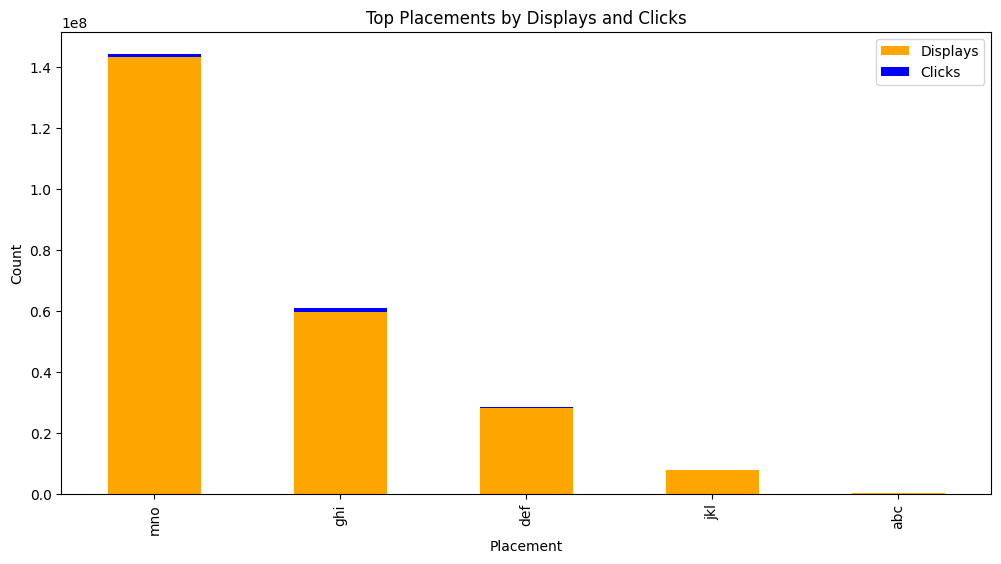

In [20]:
# 3. Which publisher spaces (placements) yielded the highest number of displays and clicks?
top_placements = data.groupby('placement')[['displays', 'clicks']].sum().sort_values(by='displays', ascending=False).head(10)
print("\nTop Placements by Displays and Clicks:")
print(top_placements)

top_placements.plot(kind='bar', figsize=(12, 6), stacked=True, color=['orange', 'blue'])
plt.title('Top Placements by Displays and Clicks')
plt.xlabel('Placement')
plt.ylabel('Count')
plt.legend(['Displays', 'Clicks'])
plt.show()


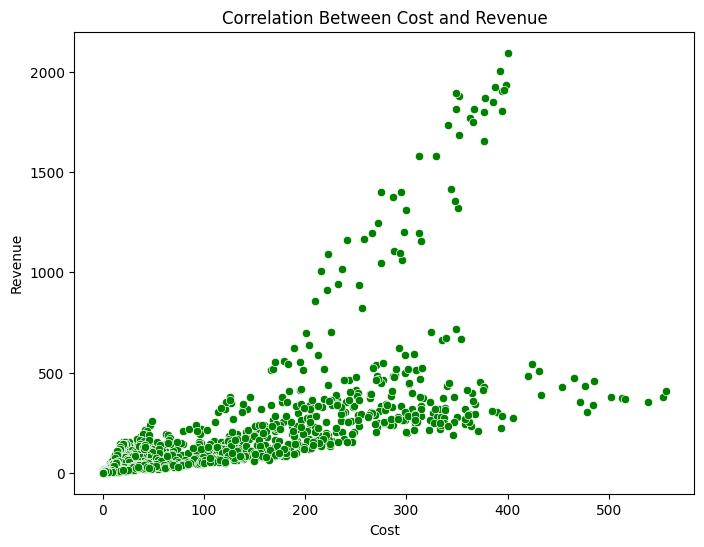


Correlation between Cost and Revenue: 0.76


In [23]:
# 4. Is there a correlation between the cost of serving ads and the revenue generated from clicks?
plt.figure(figsize=(8, 6))
sns.scatterplot(x='cost', y='revenue', data=data, color='green')
plt.title('Correlation Between Cost and Revenue')
plt.xlabel('Cost')
plt.ylabel('Revenue')
plt.show()


correlation = data['cost'].corr(data['revenue'])
print(f"\nCorrelation between Cost and Revenue: {correlation:.2f}")


In [24]:
# 5. What is the average revenue generated per click for Company X during the campaign period?

avg_revenue_per_click = data['Revenue Per Click'].mean()
print(f"\nAverage Revenue Per Click: ${avg_revenue_per_click:.2f}")



Average Revenue Per Click: $0.09


In [30]:
# 6. Which campaigns had the highest post-click conversion rates?

top_campaigns = data.groupby('post_click_conversions')['Conversion Rate'].mean().sort_values(ascending=False).head(10)
print("\nTop Campaigns by Post-Click Conversion Rates:")
print(top_campaigns)



Top Campaigns by Post-Click Conversion Rates:
post_click_conversions
2             inf
3             inf
4             inf
5             inf
6             inf
1             inf
374    145.525292
377    145.000000
793    139.367311
312    139.285714
Name: Conversion Rate, dtype: float64


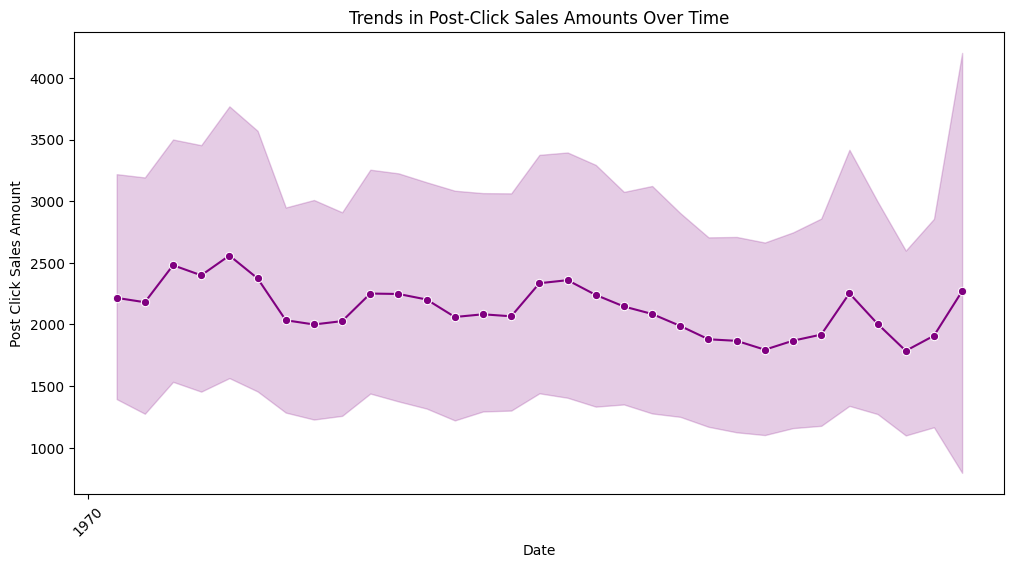

In [33]:
# 7. Are there any specific trends or patterns in post-click sales amounts over time?
plt.figure(figsize=(12, 6))
sns.lineplot(x='day', y='post_click_sales_amount', data=data, marker='o', color='purple')
plt.title('Trends in Post-Click Sales Amounts Over Time')
plt.xlabel('Date')
plt.ylabel('Post Click Sales Amount')
plt.xticks(rotation=45)
plt.show()


<ipython-input-35-702bac2bb62b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='banner', y='user_engagement', data=data, palette='muted')


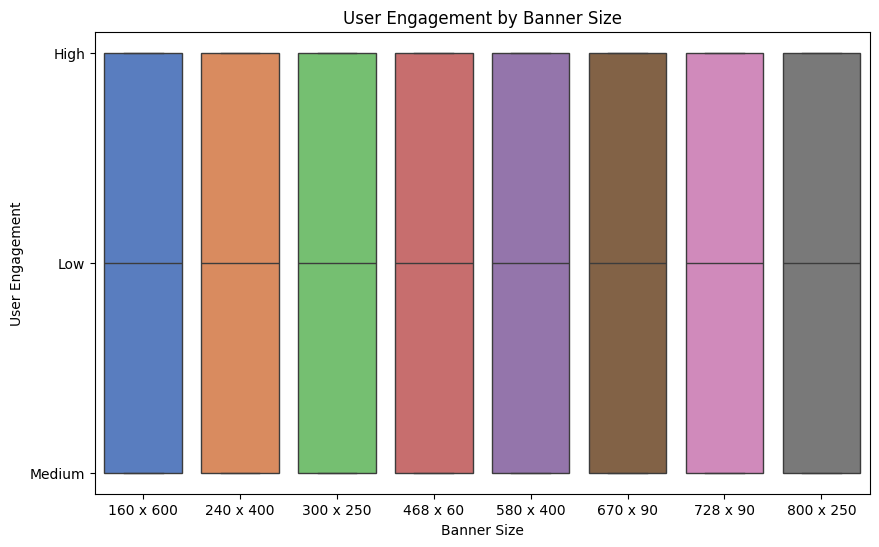

In [35]:
# 8. How does the level of user engagement vary across different banner sizes?
plt.figure(figsize=(10, 6))
sns.boxplot(x='banner', y='user_engagement', data=data, palette='muted')
plt.title('User Engagement by Banner Size')
plt.xlabel('Banner Size')
plt.ylabel('User Engagement')
plt.show()


In [37]:
# 9. Which placement types result in the highest post-click conversion rates?

top_conversion_placements = data.groupby('placement')['Conversion Rate'].mean().sort_values(ascending=False).head(10)
print("\nTop Placements by Post-Click Conversion Rates:")
print(top_conversion_placements)



Top Placements by Post-Click Conversion Rates:
placement
abc    inf
def    inf
ghi    inf
jkl    inf
mno    inf
Name: Conversion Rate, dtype: float64


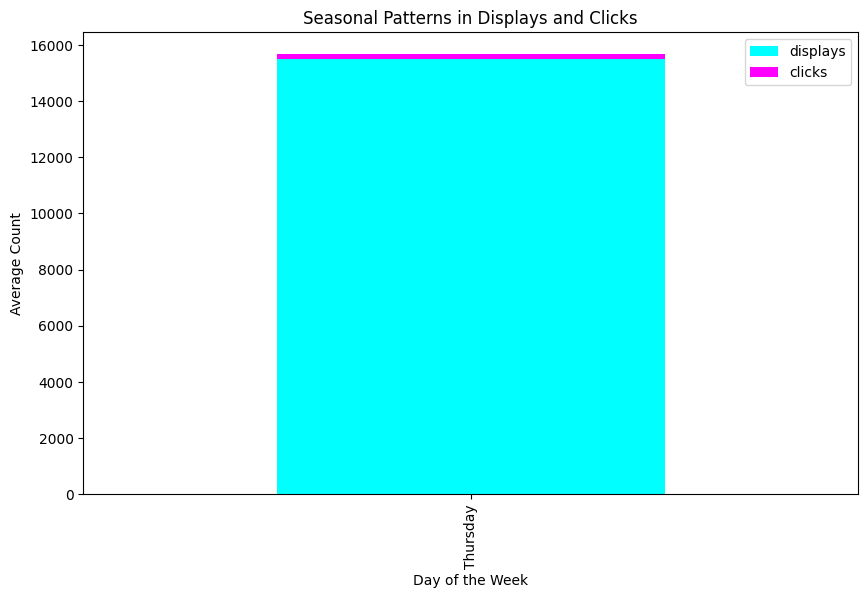

In [38]:
# 10. Can we identify any seasonal patterns or fluctuations in displays and clicks throughout the campaign period?
weekday_trends = data.groupby('Weekday')[['displays', 'clicks']].mean()

weekday_trends.plot(kind='bar', figsize=(10, 6), stacked=True, color=['cyan', 'magenta'])
plt.title('Seasonal Patterns in Displays and Clicks')
plt.xlabel('Day of the Week')
plt.ylabel('Average Count')
plt.legend(['displays', 'clicks'])
plt.show()


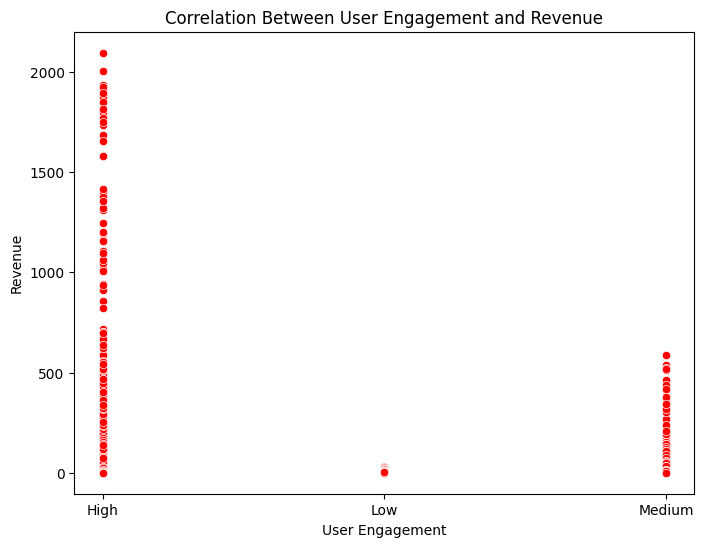


Correlation between User Engagement and Revenue: 0.18


In [42]:
# 11. Is there a correlation between user engagement levels and the revenue generated
plt.figure(figsize=(8, 6))
sns.scatterplot(x='user_engagement', y='revenue', data=data, color='red')
plt.title('Correlation Between User Engagement and Revenue')
plt.xlabel('User Engagement')
plt.ylabel('Revenue')
plt.show()


engagement_mapping = {'High': 3, 'Medium': 2, 'Low': 1}
data['user_engagement_numeric'] = data['user_engagement'].map(engagement_mapping)


data['user_engagement_numeric'] = data['user_engagement_numeric'].fillna(0)


engagement_revenue_corr = data['user_engagement_numeric'].corr(data['revenue'])
print(f"\nCorrelation between User Engagement and Revenue: {engagement_revenue_corr:.2f}")


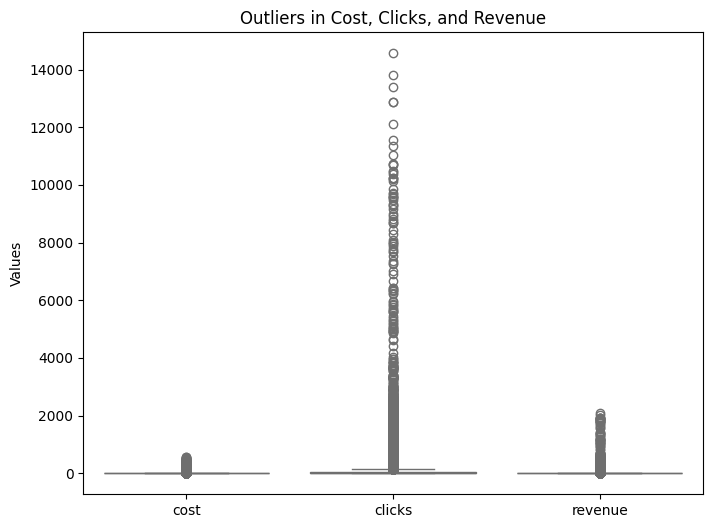

In [43]:
# 12. Are there any outliers in terms of cost, clicks, or revenue that warrant further investigation?
plt.figure(figsize=(8, 6))
sns.boxplot(data=data[['cost', 'clicks', 'revenue']], palette='pastel')
plt.title('Outliers in Cost, Clicks, and Revenue')
plt.ylabel('Values')
plt.xticks([0, 1, 2], ['cost', 'clicks', 'revenue'])
plt.show()


In [44]:
# 13. How does the effectiveness of campaigns vary based on the size of the ad and placement type?

campaign_effectiveness = data.groupby(['campaign_number', 'banner', 'placement'])[['clicks', 'revenue']].sum().reset_index()
print("\nEffectiveness of Campaigns Based on Ad Size and Placement Type:")
print(campaign_effectiveness.head(10))



Effectiveness of Campaigns Based on Ad Size and Placement Type:
  campaign_number     banner placement  clicks     revenue
0          camp 1  160 x 600       abc       0      0.0000
1          camp 1  160 x 600       def    8612   1434.2667
2          camp 1  160 x 600       ghi    7742   1291.9142
3          camp 1  160 x 600       jkl       0      0.0000
4          camp 1  160 x 600       mno   89886  15079.9859
5          camp 1  240 x 400       def   15502   2626.5298
6          camp 1  240 x 400       ghi  557480  91362.4930
7          camp 1  240 x 400       jkl   29382   4753.5799
8          camp 1  240 x 400       mno   78969  13462.8934
9          camp 1  300 x 250       abc     229     14.1979


In [45]:
# 14. Are there any specific campaigns or banner sizes that consistently outperform others in terms of ROI?

data['ROI'] = (data['revenue'] - data['cost']) / data['cost']
roi_performance = data.groupby(['campaign_number', 'banner'])['ROI'].mean().sort_values(ascending=False).head(10)
print("\nTop Campaigns and Banner Sizes by ROI:")
print(roi_performance)



Top Campaigns and Banner Sizes by ROI:
campaign_number  banner   
camp 3           800 x 250         inf
                 160 x 600    3.096757
camp 1           160 x 600    2.931911
camp 2           580 x 400    2.113678
camp 3           580 x 400    2.004255
camp 1           240 x 400    1.531187
                 300 x 250    1.171725
                 580 x 400    1.070334
camp 2           240 x 400    0.906611
                 670 x 90     0.851741
Name: ROI, dtype: float64


<ipython-input-46-5d734275adbf>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='placement', y='post_click_conversions', data=data, palette='coolwarm')


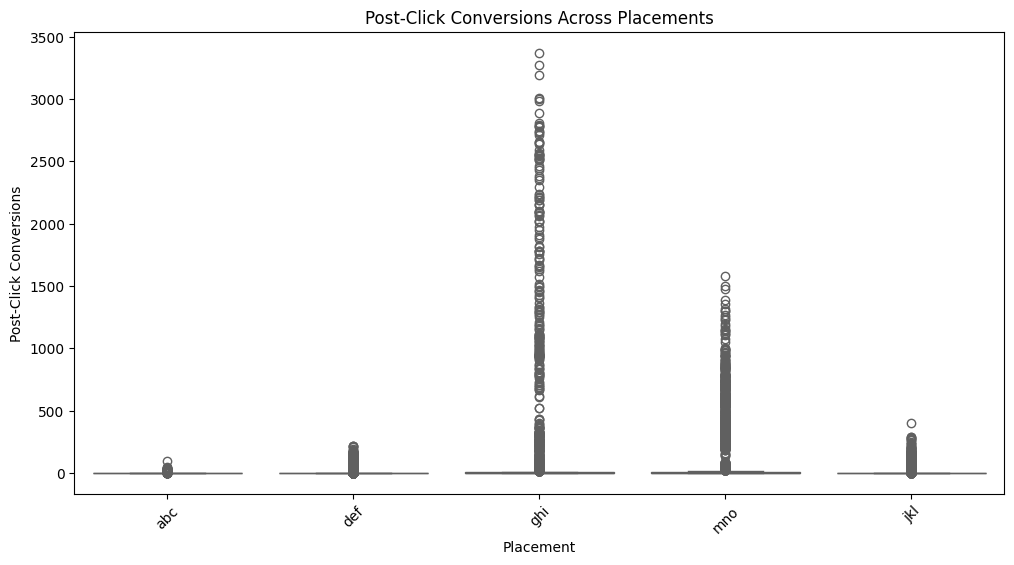

In [46]:
# 15. What is the distribution of post-click conversions across different placement types?

plt.figure(figsize=(12, 6))
sns.boxplot(x='placement', y='post_click_conversions', data=data, palette='coolwarm')
plt.title('Post-Click Conversions Across Placements')
plt.xlabel('Placement')
plt.ylabel('Post-Click Conversions')
plt.xticks(rotation=45)
plt.show()


In [48]:

engagement_mapping = {'High': 3, 'Medium': 2, 'Low': 1}
data['user_engagement_numeric'] = data['user_engagement'].map(engagement_mapping)


data['user_engagement_numeric'] = data['user_engagement_numeric'].fillna(0)


data['Is_Weekend'] = data['Weekday'].isin(['Saturday', 'Sunday'])


weekend_engagement = data.groupby('Is_Weekend')['user_engagement_numeric'].mean()


print("\nAverage User Engagement on Weekdays vs. Weekends:")
print(weekend_engagement)



Average User Engagement on Weekdays vs. Weekends:
Is_Weekend
False    1.9902
Name: user_engagement_numeric, dtype: float64


In [50]:
# 17. How does the cost per click (CPC) vary across different campaigns and banner sizes?
cpc_by_campaign = data.groupby('campaign_number')['CPC'].mean().sort_values(ascending=False)
cpc_by_banner = data.groupby('banner')['CPC'].mean().sort_values(ascending=False)

print("\nCPC by Campaign:")
print(cpc_by_campaign.head(10))

print("\nCPC by Banner Size:")
print(cpc_by_banner.head(10))



CPC by Campaign:
campaign_number
camp 1    inf
camp 2    inf
camp 3    inf
Name: CPC, dtype: float64

CPC by Banner Size:
banner
160 x 600    inf
240 x 400    inf
300 x 250    inf
468 x 60     inf
580 x 400    inf
670 x 90     inf
728 x 90     inf
800 x 250    inf
Name: CPC, dtype: float64


In [51]:
# 18. Are there any campaigns or placements that are particularly cost-effective in terms of generating post-click conversions?
data['Cost per Conversion'] = data['cost'] / data['post_click_conversions']
cost_effective_campaigns = data.groupby(['campaign_number', 'placement'])['Cost per Conversion'].mean().sort_values()
print("\nCost-Effective Campaigns and Placements:")
print(cost_effective_campaigns.head(10))



Cost-Effective Campaigns and Placements:
campaign_number  placement
camp 1           abc          inf
                 def          inf
                 ghi          inf
                 jkl          inf
                 mno          inf
camp 2           abc          inf
                 def          inf
                 ghi          inf
                 jkl          inf
                 mno          inf
Name: Cost per Conversion, dtype: float64


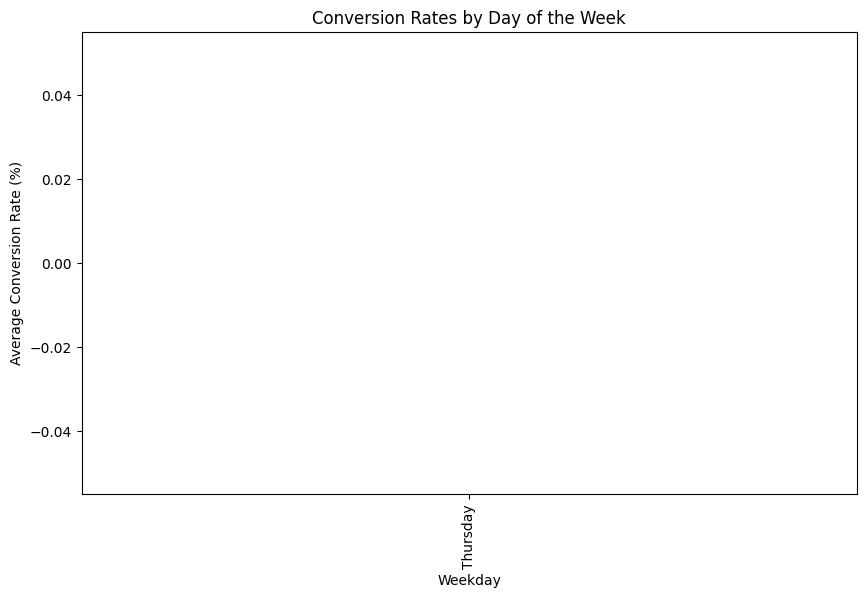

In [53]:
# 19. Can we identify any trends or patterns in post-click conversion rates based on the day of the week?
conversion_rate_by_weekday = data.groupby('Weekday')['Conversion Rate'].mean()
conversion_rate_by_weekday.plot(kind='bar', figsize=(10, 6), color='lime')
plt.title('Conversion Rates by Day of the Week')
plt.xlabel('Weekday')
plt.ylabel('Average Conversion Rate (%)')
plt.show()


In [54]:
# 20. How does the effectiveness of campaigns vary throughout different user engagement types in terms of post-click conversions?

engagement_effectiveness = data.groupby('user_engagement')['post_click_conversions'].mean().sort_values(ascending=False)
print("\nEffectiveness of Campaigns by User Engagement Type:")
print(engagement_effectiveness)



Effectiveness of Campaigns by User Engagement Type:
user_engagement
High      127.133907
Medium      5.330115
Low         0.315591
Name: post_click_conversions, dtype: float64


In [28]:
print("Column names in the dataset:")
print(data.columns)


Column names in the dataset:
Index(['month', 'day', 'campaign_number', 'user_engagement', 'banner',
       'placement', 'displays', 'cost', 'clicks', 'revenue',
       'post_click_conversions', 'post_click_sales_amount', 'Unnamed: 12',
       'Unnamed: 13', 'CPC', 'Revenue Per Click', 'Conversion Rate',
       'Weekday'],
      dtype='object')
